In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import shapefile as shp
import seaborn as sns
import geopandas as gpd

data         = pd.read_csv("rced_en.csv")
data_geo     = pd.read_csv("geothermal_heating_facilities.csv")
well_ontario = pd.read_csv("Petroleum_Well_ontario.csv")

data["Community classification"].replace('Non-indigenous', 'Non-Indigenous', inplace=True)
replacement = {'QC':'Quebec', 'BC':'British Columbia', 'YT':'Yukon', 'AB':'Alberta', 'NU':'Nunavut', 'NL':'Newfoundland and Labrador', 'SK':'Saskatchewan', 'MB':'Manitoba', 'NT':'Northwest Territories', 'ON':'Ontario'}
data["Province/Territory"].replace(replacement,inplace=True)

In [2]:
data["Province/Territory"].value_counts()

British Columbia             75
Quebec                       42
Northwest Territories        38
Ontario                      30
Nunavut                      28
Newfoundland and Labrador    28
Yukon                        22
Alberta                       7
Manitoba                      5
Saskatchewan                  1
Name: Province/Territory, dtype: int64

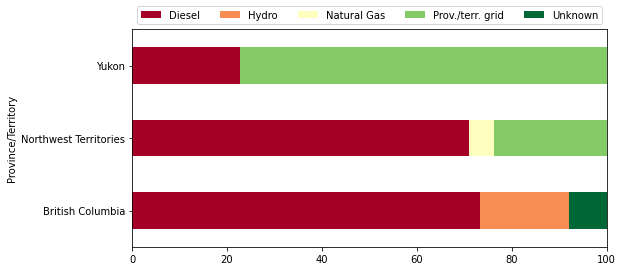

In [6]:
provinces0 = data.groupby("Province/Territory")
BC_Y_NWT = pd.concat([provinces0.get_group('British Columbia'), provinces0.get_group('Yukon'),provinces0.get_group('Northwest Territories')])
s = BC_Y_NWT.groupby("Province/Territory")["Main power source"].value_counts(normalize=True).mul(100)
s.unstack().plot.barh(figsize = (8.5,4),stacked=True,colormap='RdYlGn')
plt.legend(ncol=len(BC_Y_NWT.groupby("Province/Territory")["Main power source"].value_counts(normalize=True)), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='medium')
plt.xlim(0,100)
resolution_value = 1200
plt.savefig("provinces.png", format="png", dpi=resolution_value,bbox_inches = 'tight')
plt.show()
